Approximate the complete design space using only the sampled conditions and use a random subset of samples to train the NN to predict switching. Query the remaining set of samples to find conditions the NN predicts to have improved switching. Update model on selected set and repeat.

In [1]:
# SET SIMULATION PARAMETERS 

# initial number of training conditions 
n_init = 10 

# number of conditions to design 
n_design = 10 

# rounds of design, test, learn 
n_rounds =  5

# number of trials 
n_trials = 10

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import itertools 
from scipy.special import comb

from scipy.stats import linregress

from parabola.laplace_nn2 import *

from tqdm import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-yvu1g6z8 because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df_results = pd.read_csv("simulation/nn_optimization.csv")
df_random = pd.read_csv("simulation/random_optimization.csv")

In [4]:
df_results

,0,1,2,3,4,5,6,7,8,9
0,0.103120,0.171295,0.228337,0.171154,0.125646,0.091380,0.223677,0.197993,0.184598,0.220177
1,0.165050,0.171295,0.228337,0.171154,0.125646,0.188830,0.223677,0.197993,0.200908,0.220177
2,0.172544,0.215162,0.228337,0.171154,0.255389,0.266545,0.223677,0.197993,0.200908,0.237233
3,0.211036,0.218779,0.269067,0.205615,0.255389,0.269067,0.223677,0.205901,0.200908,0.237233
4,0.220829,0.245739,0.269067,0.259825,0.255389,0.269067,0.223677,0.235131,0.266545,0.266545
5,0.250221,0.245739,0.269067,0.259825,0.255389,0.269067,0.250221,0.266545,0.266545,0.266545


In [5]:
df_random

,0,1,2,3,4,5,6,7,8,9
0,0.103120,0.171295,0.228337,0.171154,0.125646,0.091380,0.223677,0.197993,0.184598,0.220177
1,0.129147,0.171295,0.228337,0.171154,0.125646,0.091380,0.223677,0.197993,0.194055,0.220177
2,0.181543,0.184707,0.228337,0.214187,0.125646,0.163482,0.223677,0.197993,0.194055,0.220177
3,0.181543,0.184707,0.228337,0.214187,0.152071,0.190825,0.223677,0.197993,0.220153,0.220177
4,0.181543,0.184707,0.228337,0.214187,0.266251,0.205715,0.223677,0.200362,0.220153,0.220177
5,0.181543,0.184707,0.228337,0.214187,0.266251,0.205715,0.223677,0.200362,0.226570,0.220177


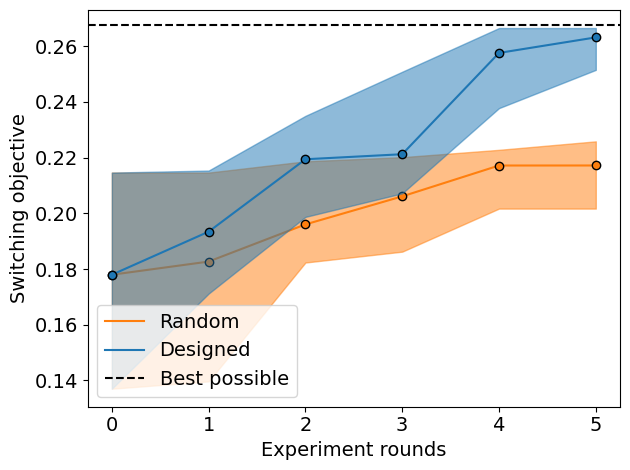

In [6]:
q25, q50, q75 = np.quantile(df_random.values, [.25, .5, .75], 1)
plt.plot(np.arange(df_results.shape[0]), q50, c='C1', label="Random", zorder=0)
plt.scatter(np.arange(df_results.shape[0]), q50, c='C1', edgecolor='k', zorder=1)
plt.fill_between(np.arange(df_results.shape[0]), q25, q75, color='C1', alpha=.5, zorder=0)

q25, q50, q75 = np.quantile(df_results.values, [.25, .5, .75], 1)
plt.plot(np.arange(df_results.shape[0]), q50, c='C0', label="Designed", zorder=2)
plt.scatter(np.arange(df_results.shape[0]), q50, c='C0', edgecolor='k', zorder=3)
plt.fill_between(np.arange(df_results.shape[0]), q25, q75, color='C0', alpha=.5, zorder=2)

plt.axhline(y=0.26777875, c='k', linestyle='--', label='Best possible')

plt.legend(fontsize=14)
plt.xlabel("Experiment rounds", fontsize=14)
plt.ylabel("Switching objective", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
# plt.savefig("figures/optimization_simulation.png", dpi=300)
plt.show()